In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve
from matplotlib import colors
from scipy import interpolate
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import CubicSpline
from scipy.interpolate import BSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_lsq_spline
from sklearn import preprocessing

In [58]:
error=0.0006
lower=485
upper=1200
Num=600
num=31
Frame=230
tt='reflect'
cmapt='hot'
val=2
typ='cubic'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0100','0250','0500']
label=['A','B','C']
total=[albnum,alanum,alanum,alanum,alanum,sianum,sibnum]
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
dfys={}
dfxs={}
dfnan={}
xzs=[0.133,0.15,0.296,0.444]
for x in xzs:
    yt=[]
    ytn=[]
    
    for k in ['AL-B','AL-A','AL-C','SiO2-A','SiO2-B','SiO2-C','SiC-A','SiC-B','SiC-C']:
            T={}
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    for column in df.index:
                        if column>x-error and column<x+error:
                            y=df.loc[column].values[0]
                            #print(y)
                            ys.append(y)
                            yns.append(y)
                            break
                except Exception as e:
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    yns.append(np.nan)
                    pass
            T['{}'.format]=yns
            TT=DataFrame(T)
            TTT=TT.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
            Yns=TTT.values
            yt.append(ys)
            ytn.append(Yns)
            #ytn.append(yns)
    dfys['EEL_Compoent_{}_Line_{}'.format(x,i)]=yt
    dfnan['EEL_Compoent_{}_Line_{}'.format(x,i)]=ytn
df3 = pd.DataFrame.from_dict(dfys, orient='index')
df2 = pd.DataFrame.from_dict(dfnan, orient='index')
df2.drop([2,8],axis=1,inplace=True)
#df3=dff3.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
#df3.to_csv('EELxx_{}.csv'.format(x))
a,b=df3.shape
df2.to_csv('EELxx_{}.csv'.format(x))
stelement=['AlB','AlA','SiO2A','SiO2B','SiO2C','SiCA','SiCB']
z=0
whole={}
whole1={}
whole2={}

In [59]:
a,b=df2.shape
for row in range(0,a):
    co=0
    y=df2.iloc[row].values
    '''fig= plt.figure(figsize=(17,14))
    axes=fig.add_subplot(1,1,1)'''
    for value in y:
        V=[]
        for j in value:
            V.append(j[0])
        mean=np.full(val,1/val)
        #fig= plt.figure(figsize=(12,10))
        #axes=fig.add_subplot(1,1,1)
        pos=numbers
        #display(V,len(numbers))
        #interp1d(x, y, kind='cubic')
        f = interp1d(numbers,V,kind=typ)
        #f = interpolate.interp1d(pos, value)
        #f=interpolate.Akima1DInterpolator(pos,value)
        #f=interpolate.CubicSpline(pos,value)
        #f=interpolate.BSpline(pos,value,1)
        #f=interpolate.make_interp_spline(pos,value)
        xnew=np.linspace(0,3100,num)
        '''plt.scatter(numbers,value),plt.plot(xnew,convolve(f(xnew),mean,mode=tt))
        plt.legend(['Interplotation','DataPlot'])
        plt.title('Line_{}_{}_Smooth{}'.format(stelement[z],xzs[row],val))
        plt.savefig('Line_{}_{}_S{}.png'.format(stelement[z],xzs[row],val))'''
        #display(xzs[row],stelement[z])
        nosiy=convolve(f(xnew),mean,mode=tt)
        whole['EEL={}_line_{}'.format(xzs[row],stelement[z])]=value
        whole1['EEL={}_line_{}'.format(xzs[row],stelement[z])]=nosiy
        z+=1
        if z==len(stelement):
            z=0

                #print('Nan')
#finaldf =pd.DataFrame.from_dict(whole, orient='index')
#display(finaldf,whole)
finaldf1 =DataFrame(whole1)
#finaldf1.to_csv('First.csv')
finaldf2=DataFrame(whole2)

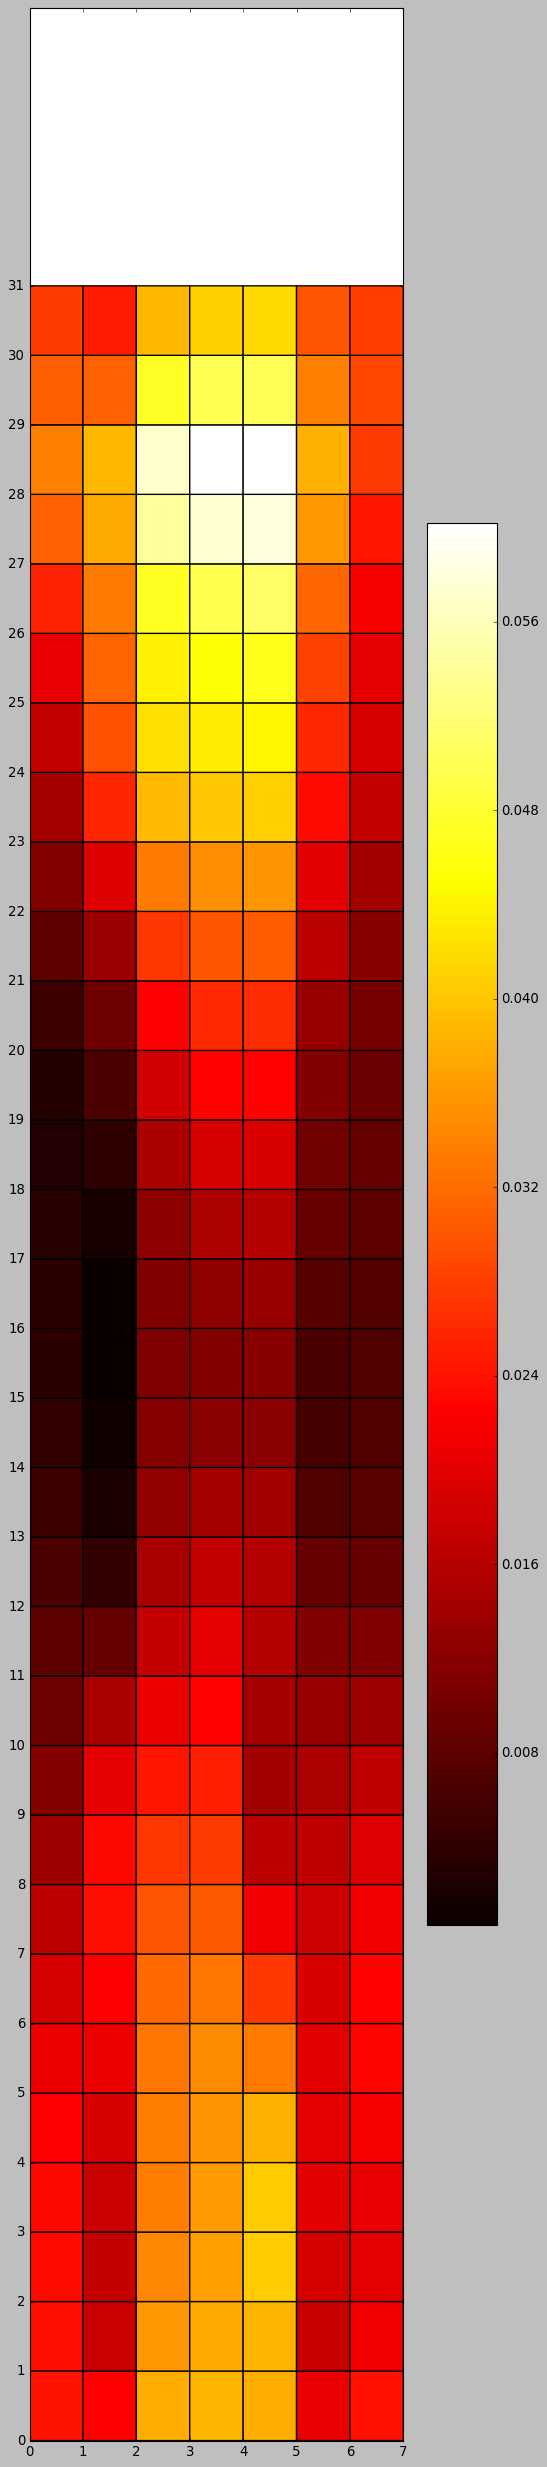

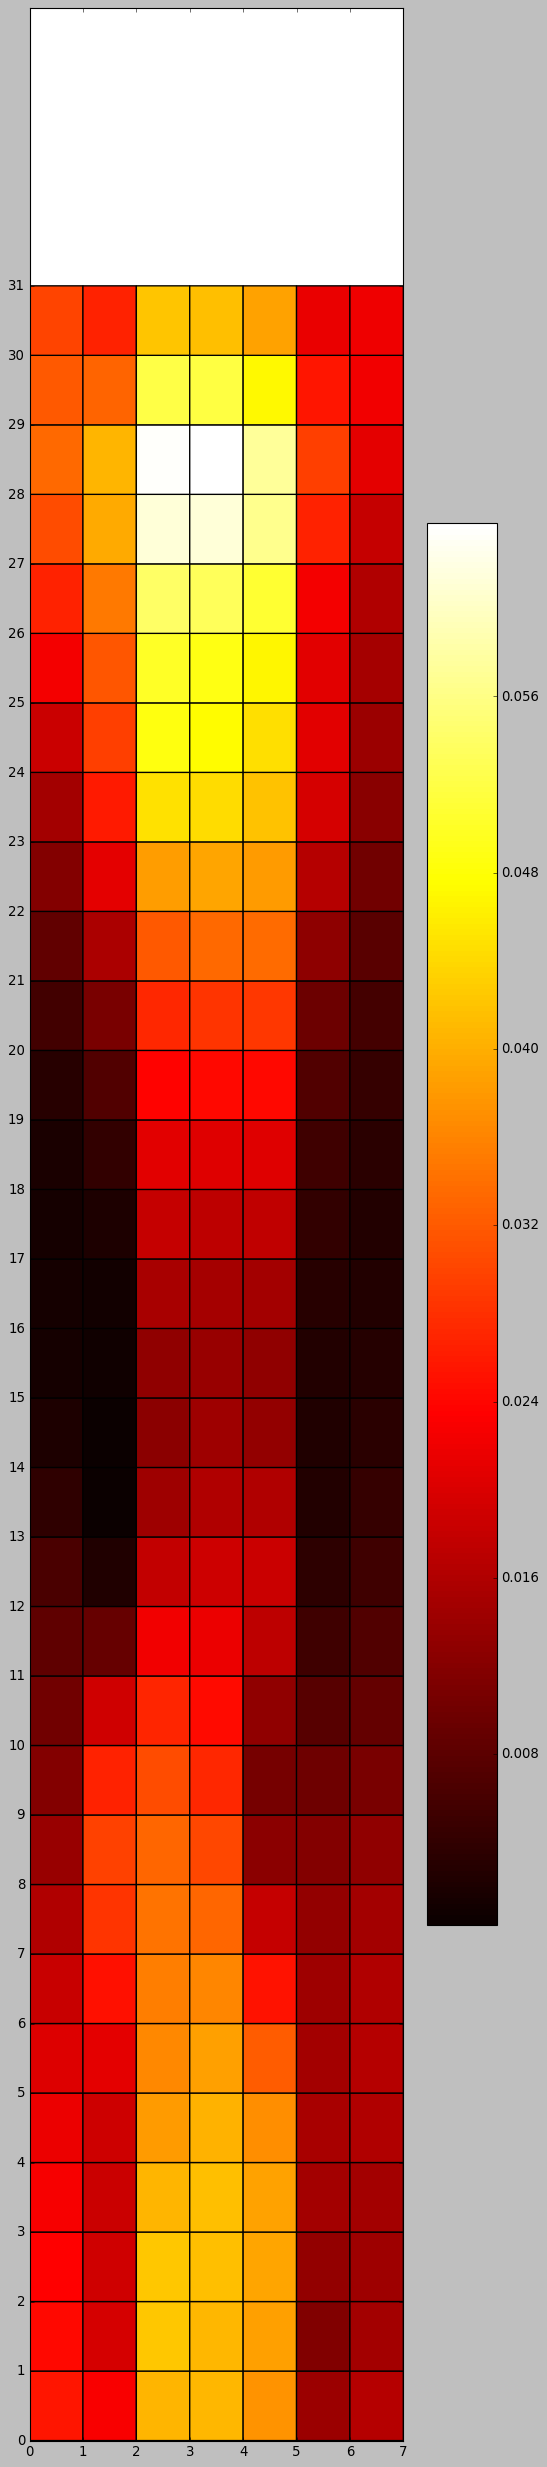

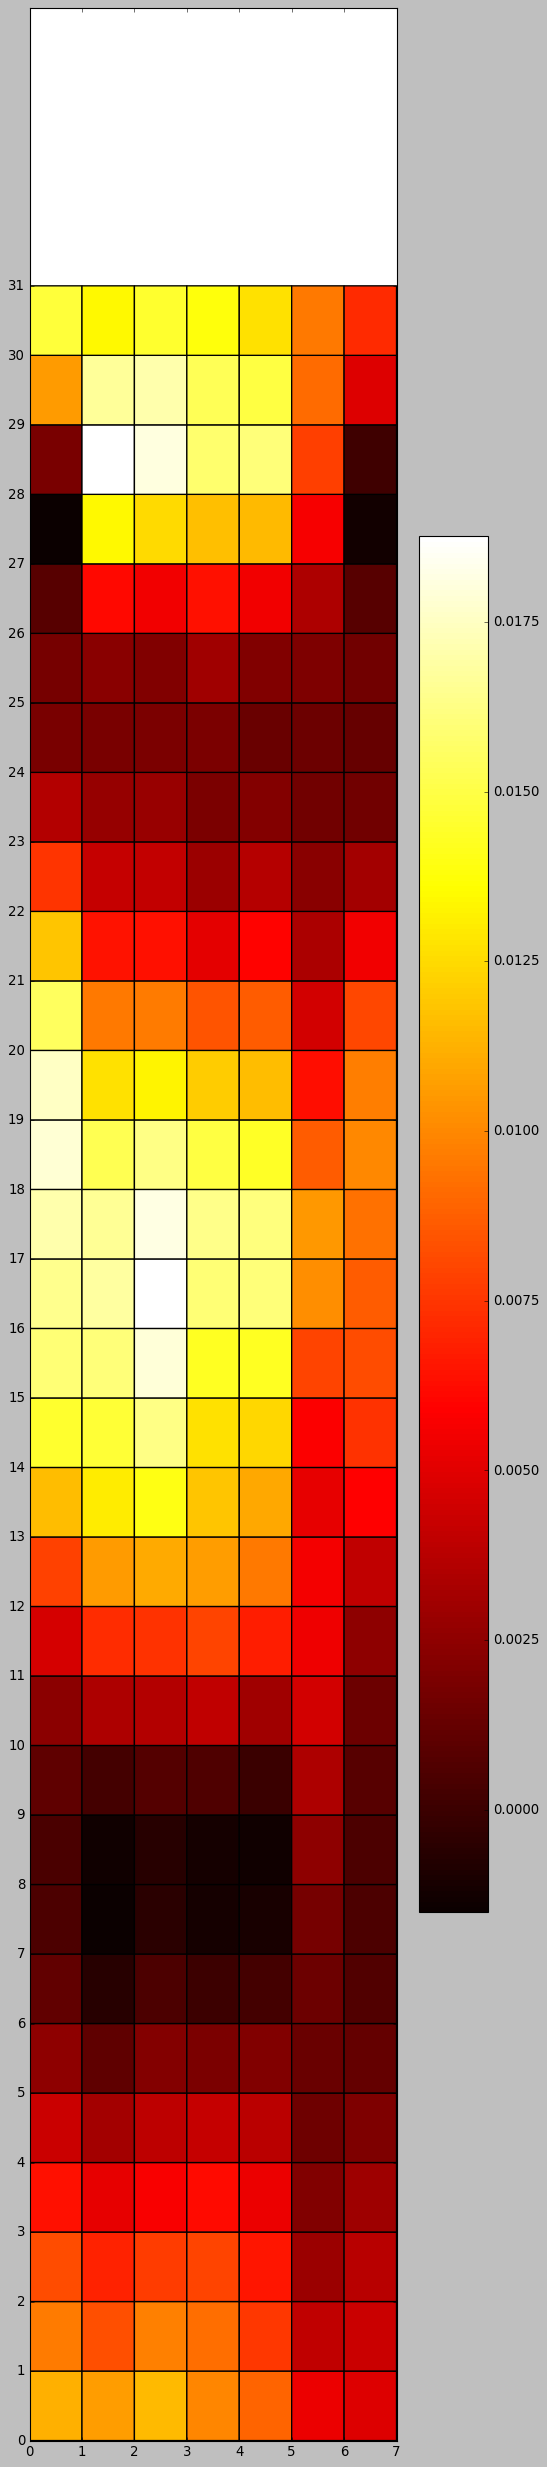

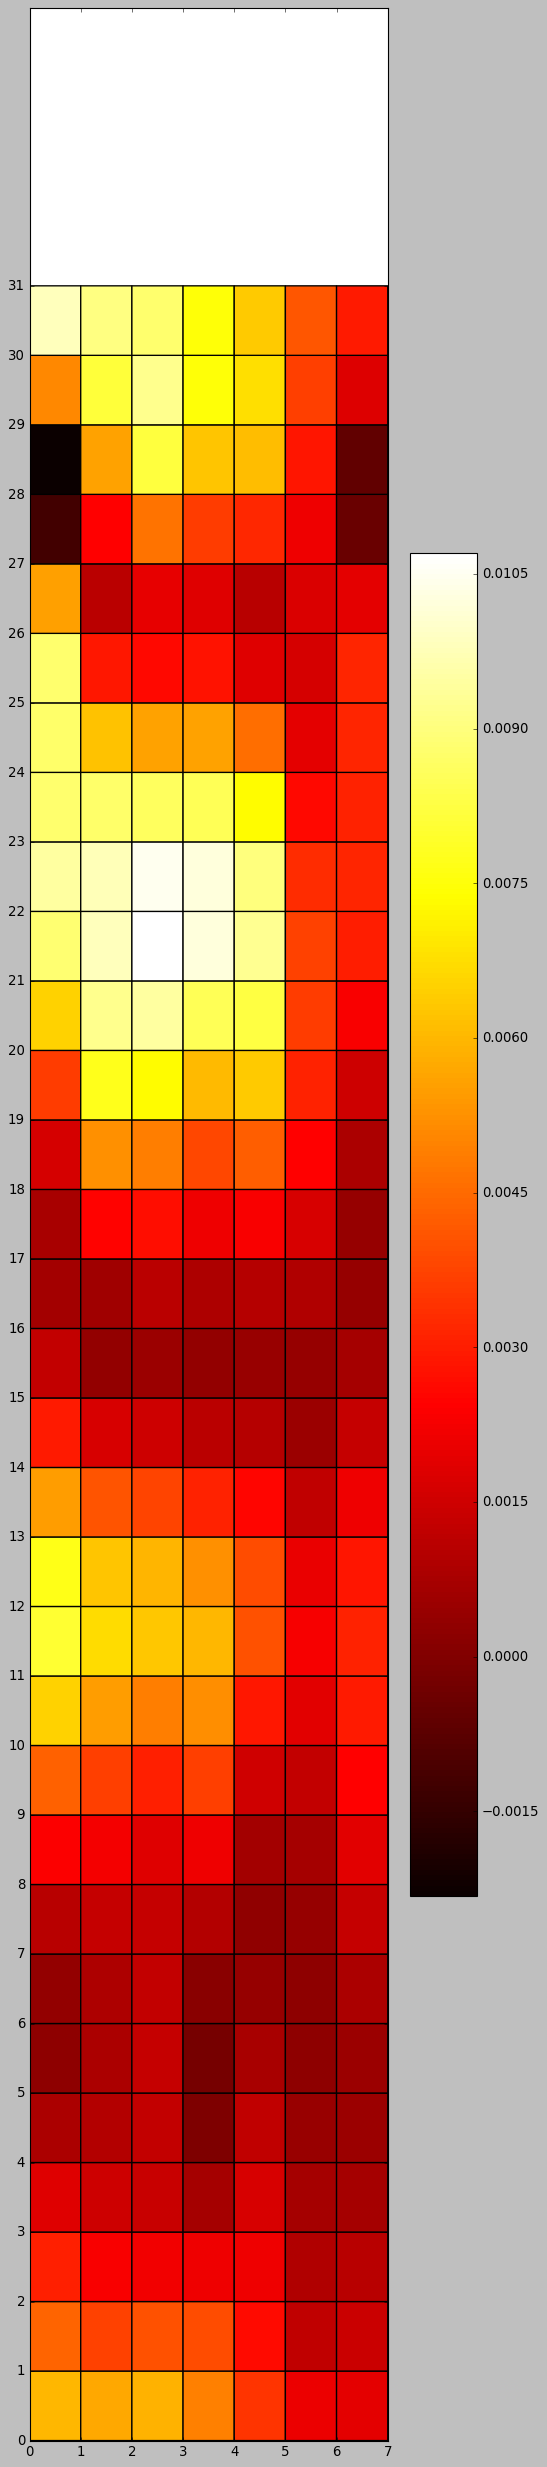

In [61]:
#plt.imshow(finaldf1.values,cmap='hot')
a,b=finaldf1.shape
col=a/7
#display(a,b)
FF={}
for i in range(1,int(col)+1):
    y=finaldf1.iloc[:,(i-1)*7:i*7].values
    fig= plt.figure(figsize=(7,31))
    plt.pcolor(y, edgecolors='k', linewidths=1.2,cmap='hot')
    plt.yticks(np.arange(0, 32, step=1))
    plt.colorbar()
    plt.savefig('Y100{}.png'.format(i),bbox_inches='tight')
    fig.tight_layout()

In [48]:
finaldf1

,EEL=0.133_line_AlB,EEL=0.133_line_AlA,EEL=0.133_line_SiO2A,EEL=0.133_line_SiO2B,EEL=0.133_line_SiO2C,EEL=0.133_line_SiCA,EEL=0.133_line_SiCB,EEL=0.15_line_AlB,EEL=0.15_line_AlA,EEL=0.15_line_SiO2A,...,EEL=0.296_line_SiO2C,EEL=0.296_line_SiCA,EEL=0.296_line_SiCB,EEL=0.444_line_AlB,EEL=0.444_line_AlA,EEL=0.444_line_SiO2A,EEL=0.444_line_SiO2B,EEL=0.444_line_SiO2C,EEL=0.444_line_SiCA,EEL=0.444_line_SiCB
0,0.024124,0.022344,0.037780,0.038352,0.037769,0.020495,0.023779,0.025387,0.022978,0.040619,...,0.008911,0.005347,0.004896,0.005992,0.005710,0.005907,0.004956,0.003458,0.002093,0.001914
1,0.023628,0.017878,0.035988,0.037304,0.038511,0.017599,0.021246,0.024299,0.019494,0.042311,...,0.007579,0.003972,0.004324,0.004354,0.003729,0.004006,0.003913,0.002621,0.001213,0.001430
2,0.023310,0.017199,0.034368,0.036586,0.040579,0.018761,0.020000,0.023495,0.018956,0.042271,...,0.006519,0.002879,0.003766,0.003061,0.002334,0.002165,0.002122,0.002125,0.000925,0.001051
3,0.023063,0.017826,0.033667,0.036230,0.040648,0.019945,0.020600,0.022750,0.018590,0.040583,...,0.005345,0.002082,0.002949,0.001824,0.001457,0.001346,0.000696,0.001682,0.000693,0.000711
4,0.022479,0.019014,0.033468,0.035782,0.038023,0.020186,0.022073,0.021770,0.018821,0.038243,...,0.003869,0.001580,0.002006,0.000787,0.000980,0.001289,-0.000063,0.001213,0.000434,0.000495
5,0.021128,0.020704,0.032951,0.034690,0.033303,0.019873,0.022987,0.020300,0.021030,0.036404,...,0.002079,0.001365,0.001214,0.000249,0.000789,0.001316,-0.000222,0.000754,0.000263,0.000526
6,0.018996,0.022460,0.031741,0.032829,0.027406,0.019214,0.022756,0.018343,0.024849,0.035300,...,0.000259,0.001435,0.000703,0.000345,0.000880,0.001245,0.000143,0.000403,0.000243,0.000819
7,0.016415,0.023515,0.029845,0.030435,0.021483,0.018234,0.021506,0.016112,0.028433,0.034400,...,-0.001066,0.001798,0.000479,0.001068,0.001331,0.001312,0.000959,0.000312,0.000392,0.001296
8,0.013763,0.023059,0.027317,0.027790,0.016716,0.016933,0.019457,0.013850,0.029747,0.033070,...,-0.001338,0.002460,0.000529,0.002396,0.002236,0.001810,0.002154,0.000637,0.000725,0.001871
9,0.011414,0.020291,0.024216,0.025173,0.014276,0.015312,0.016829,0.011797,0.026772,0.030681,...,-0.000008,0.003426,0.000842,0.004301,0.003682,0.003027,0.003653,0.001532,0.001254,0.002454
